In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

### Pair Programming Visualización II

Sigamos con más visualizaciones. En este caso trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno. El objetivo de hoy, mejorar algunas de las gráficas que hicimos en el ejericio de pair programming de ayer y crear algunas nuevas aprovechando que tenemos algunas columnas nuevas en dataframe.

In [4]:
df_union = pd.read_csv('../Pandas/datos/05-attacks_union.csv', index_col= 0)
df_union.head(2)

,case_number,year,type,country,area,location,activity,name,sex,age,...,href,investigator_or_source,pdf,href_formula,case_number.1,case_number.2,original_order,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Hacer dos gráficas para USA y España con subplots:

### En la primera debéis mostrar los tipos ataques en USA y España.

Cada subplot corresponderá a un país.

Debéis:
- Poner nombre a los ejes de cada uno de los subplots
- Poner un títulos a cada uno de los subplots
- Poner el color de las líneas en negro.
- Establecer el tamaño de la gráfica a 15 x 5
- Ponerle marcadores a las gráficas
- No incluir leyenda

In [5]:
# solo los del 2000, pero del tiburones no del describe porque en ese nos quita el año
df_union[(df_union["country"] == "USA") & (df_union["year"] >2000)].shape[0]

959

In [6]:
# ponemos type porque el value count tiene que hacerse sobre una columna siempre y nos lo dice el enunciado que se por tipo
ataques_usa = df_union[(df_union["country"] == "USA") & (df_union["year"] >2000)]['type'].value_counts()
ataques_usa

Unprovoked      797
Invalid          65
Provoked         60
Boating          32
Boat              3
Sea Disaster      2
Name: type, dtype: int64

In [ ]:
df_union[(df_union["country"] == "SPAIN") & (df_union["year"] >2000)].shape[0]

16

In [ ]:
ataques_spain = df_union[(df_union["country"] == "SPAIN") & (df_union["year"] >2000)]['type'].value_counts()
ataques_spain

Unprovoked    9
Invalid       5
Provoked      2
Name: type, dtype: int64

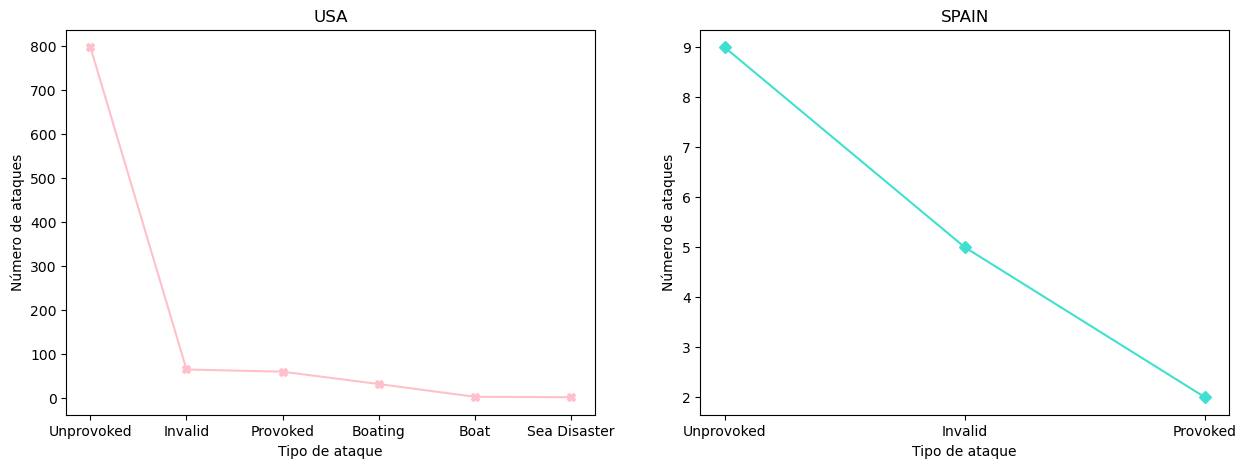

In [ ]:
# no las ponemos en negro nos gusta mas en este color
fig,ax = plt.subplots(1,2, figsize=  (15,5))

x = ataques_usa.index
y = ataques_usa.values

x2 = ataques_spain.index
y2 = ataques_spain.values


ax[0].plot(x, y, c= 'pink', marker= 'X' )
ax[0].set_title('USA')
ax[0].set_xlabel('Tipo de ataque')
ax[0].set_ylabel('Número de ataques')



ax[1].plot(x2, y2, c= 'turquoise', marker ='D')
ax[1].set_xlabel('Tipo de ataque')
ax[1].set_ylabel('Número de ataques')
ax[1].set_title('SPAIN')

plt.savefig('01-graficas-ataques.png')

### En la segunda debéis mostrar los ataques por año para cada uno de los países.

De nuevo tendréis que ponerle nombre a los ejes y título a cada gráfica. En este caso el subplot deberá tener dos filas y una columna.
- No incluir leyenda
- Cambiar el color de las barras
- Cread un único gráfico donde juntéis las gráficas de los tipos de ataques en una sola. 

Debéis:

- Poner leyenda a la gráfica
- Cada línea debe ir en un color
- Ponerle nombre a los ejes y a la gráfica.
- Poner marcadores a las lineas.

In [ ]:
df_union[(df_union["country"] == "USA") & (df_union["year"]>2000)].shape[0]

959

In [ ]:
# ponemos type porque el value count tiene que hacerse sobre una columna siempre y nos lo dice el enunciado que se por tipo
ataques_usa_anio = df_union[(df_union["country"] == "USA") & (df_union["year"]>2000)]['year'].value_counts()
ataques_usa_anio

2015.0    73
2007.0    66
2014.0    65
2017.0    65
2016.0    64
2012.0    63
2008.0    60
2013.0    59
2001.0    58
2003.0    57
2006.0    54
2005.0    52
2002.0    49
2011.0    48
2009.0    41
2010.0    40
2004.0    35
2018.0    10
Name: year, dtype: int64

In [ ]:
df_union[(df_union["country"] == "SPAIN") & (df_union["year"]>2000)].shape[0]

16

In [ ]:
ataques_spain_anio = df_union[(df_union["country"] == "SPAIN") & (df_union["year"]>2000)]['year'].value_counts()
ataques_spain_anio

2017.0    4
2014.0    4
2016.0    2
2015.0    2
2013.0    1
2010.0    1
2009.0    1
2006.0    1
Name: year, dtype: int64

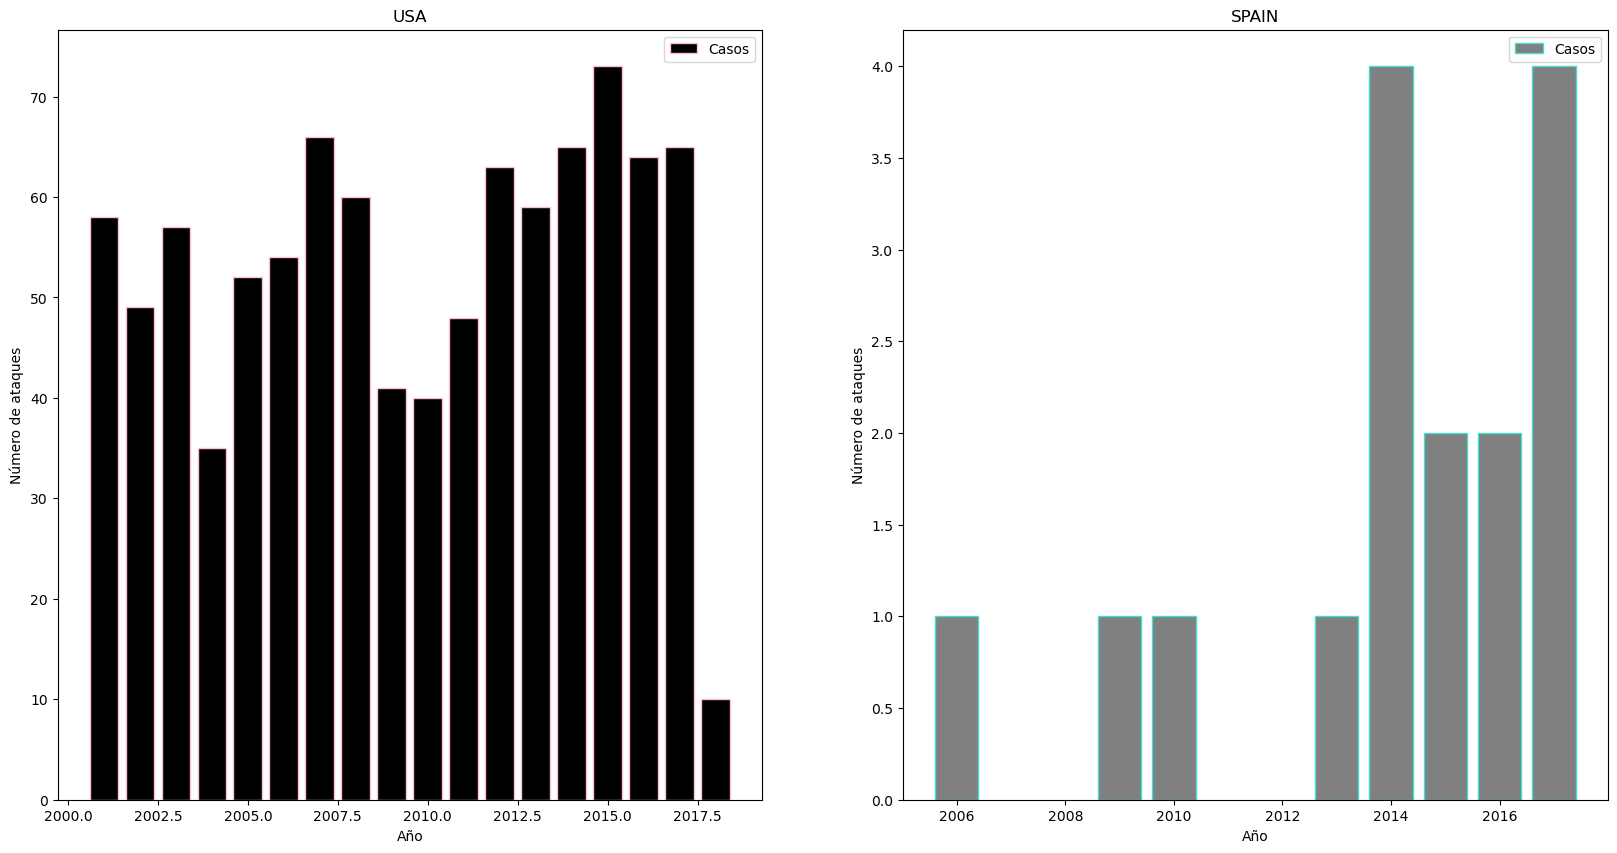

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (20,10))

x3 = ataques_usa_anio.index
y3 = ataques_usa_anio.values

x4 = ataques_spain_anio.index
y4 = ataques_spain_anio.values


ax[0].bar(x3,y3, color='black',edgecolor = 'pink' )
ax[0].set_title('USA')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Número de ataques')
ax[0].legend(labels=['Casos'])


ax[1].bar(x4,y4, color='grey',edgecolor = 'turquoise' )
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Número de ataques')
ax[1].legend(labels=['Casos'])
ax[1].set_title('SPAIN')

plt.savefig('02-graficas-ataques.png')

## 2. Crear un único gráfico donde juntéis las gráficas de los tipos de ataques en una sola:

Debéis:
- Poner leyenda a la gráfica
- Cada línea debe ir en un color
- Ponerle nombre a los ejes y a la gráfica.
- Poner marcadores a las lineas.

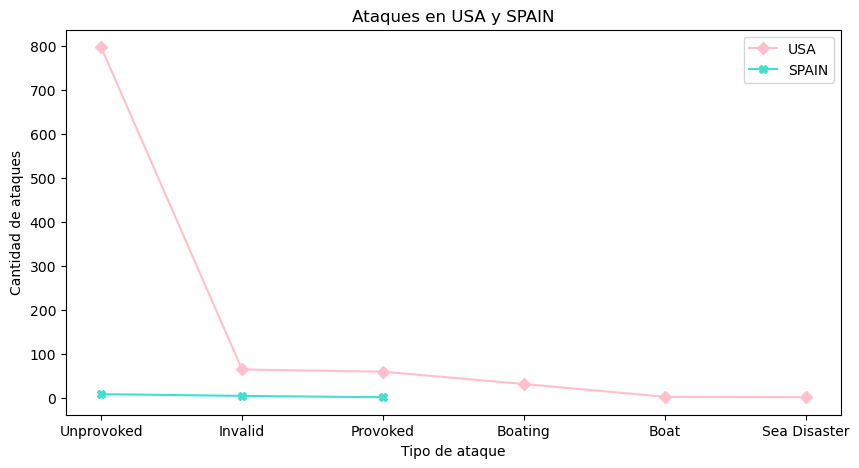

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))

plt.plot(x,y, color="pink", marker="D")
plt.plot(x2,y2, color="turquoise", marker="X")

plt.title("Ataques en USA y SPAIN")

ax.set_xlabel("Tipo de ataque")
ax.set_ylabel("Cantidad de ataques")

ax.legend(labels=["USA","SPAIN"])

plt.savefig('03-graficas-unidas-tipo.png')


### Guardad las figuras creadas en cada caso.

Podéis usar el formato que queráis. Guardad todas las fotos en una carpeta llamada Visualizacion-II.

Creada se llama 02-Visualizacion_2